# Local LLM example

Prerequisites:
- Download Ollama client: https://ollama.com/download 
- Install python Ollama package: `pip install ollama`
- Load two models:
    - llama3.2 for text processing: `ollama run llama3.2:3b`
    - llama3.2-vision for image processing: `ollama run llama3.2-vision`

Optional:
- Create a new conda environment with python3.11
  - `conda create -n ollama python=3.11`
- Install open-webui platform: https://github.com/open-webui/open-webui
- Launch open-webui in terminal: `open-webui serve`

In [ ]:
import ollama

## Basic generation

In [2]:
response = ollama.generate(model='llama3.2:3b', prompt='Why is the sky blue?')

In [3]:
response.dict()

{'model': 'llama3.2:3b',
 'created_at': '2025-04-10T17:33:01.428457Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 9224520125,
 'load_duration': 3908063000,
 'prompt_eval_count': 31,
 'prompt_eval_duration': 960000000,
 'eval_count': 320,
 'eval_duration': 4354000000,
 'response': "The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.\n\nHere's what happens:\n\n1. When sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).\n2. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.\n3. This is because the smaller molecules are more effective at scattering the shorter wavelengths, which are also more easily deflected by the molecular collisions.\n4. As a result, the blue light is scattered in all directions and reaches our ey

In [4]:
print(response['response'])

The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.

Here's what happens:

1. When sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).
2. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.
3. This is because the smaller molecules are more effective at scattering the shorter wavelengths, which are also more easily deflected by the molecular collisions.
4. As a result, the blue light is scattered in all directions and reaches our eyes from all parts of the sky, making it appear blue to us.

The reason why we don't see the red light as much is because it has a longer wavelength, which means it's less easily deflected by the molecules in the atmosphere. As a result, most of the sunlight that reaches our eyes is filtered through and 

## Chat

In [5]:
messages = ['What is my name?', 'My name is Dima', 'What is my name?']

from ollama import ChatResponse

message_history = []

for message in messages:
  message_history.append({
      'role': 'user',
      'content': message,
    })
  response: ChatResponse = ollama.chat(model='llama3.2:3b', messages=message_history)
  message_history.append({
      'role': 'assistant',
      'content': response.message.content,
    })
  print(message)
  print(response.message.content)
  print('---')


What is my name?
I don't have any information about your name. We just started our conversation, and I'm a large language model, I don't have the ability to store personal data or remember individual users. Each time you interact with me, it's a new conversation. Would you like to share your name with me?
---
My name is Dima
It's nice to meet you, Dima! How can I assist you today? Do you have any questions or topics you'd like to discuss? I'm here to help.
---
What is my name?
You've already told me that your name is Dima. I remember from our previous conversation. Is there anything else you'd like to chat about, or would you like to start a new topic?
---


In [6]:
message_history

[{'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': "I don't have any information about your name. We just started our conversation, and I'm a large language model, I don't have the ability to store personal data or remember individual users. Each time you interact with me, it's a new conversation. Would you like to share your name with me?"},
 {'role': 'user', 'content': 'My name is Dima'},
 {'role': 'assistant',
  'content': "It's nice to meet you, Dima! How can I assist you today? Do you have any questions or topics you'd like to discuss? I'm here to help."},
 {'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': "You've already told me that your name is Dima. I remember from our previous conversation. Is there anything else you'd like to chat about, or would you like to start a new topic?"}]

## Wikipedia text summary

In [7]:
import wikipedia

wiki_page = wikipedia.page('Oura Health')
wiki_page_text = wiki_page.content
print(wiki_page_text)

Oura Health Ltd (natively Oura Health Oy) is a Finnish health technology company, known for the Oura Ring (stylized Ōura), a smart ring used to track sleep and physical activity. The company was founded in 2013 by Petteri Lahtela, Kari Kivelä, and Markku Koskela. Harpreet Singh Rai was the CEO from 2018 until 2021, when he was replaced on an interim basis by Michael Chapp. In 2022, Tom Hale was appointed CEO. The company is headquartered in Oulu, Finland, with other locations in Helsinki, Finland, and San Francisco, United States. The company raised its initial US$2.3 million seed funding in 2015 led by Lifeline Ventures, introduced the first-generation ring via Kickstarter in 2016 and launched the ring at the Slush tech conference in 2017.
In 2020, Oura Health received the 'Best Consumer Wellness Company' award from the UCSF Digital Health Awards and Time magazine's "100 Best Inventions of 2020" mentioning especially its COVID-19-related partnership with NBA. Oura announced Series C f

## Unstructured summary example

In [8]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Summarize this text: {wiki_page_text}. Use at most 3 sentences. Be concise.',
)
print(response['response'])

Here's a summary of the text:

Oura Health Ltd is a Finnish health technology company that developed the popular smart ring, tracking sleep and physical activity data. The company was founded in 2013 and has received significant funding, including from top investors like The Chernin Group and Eisai. Oura Ring has been praised for its innovation and accuracy, but also criticized for its high membership fees and some accuracy issues with certain features.


In [9]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Who are the founders of Oura Health?',
)
print(response['response'])

The founders of Oura Health are Timo Sohljola and Harri Porras, but most notably by a co-founder named Timo Sohja.


In [10]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Carefully read this wiki page: {wiki_page_text}. Who are the founders of Oura Health? Reply in one sentence.',
)
print(response['response'])

The founders of Oura Health Ltd, a Finnish health technology company, are Petteri Lahtela, Kari Kivelä, and Markku Koskela.


## Structured output example

In [ ]:
from pydantic import BaseModel

class CompanyInfo(BaseModel):
    name: str
    foundation_year: str
    founders: list[str]
    headquarters: str

In [ ]:
system_prompt = """
Parse the information from a Wikipedia article about a company and fill out the required JSON schema accurately, 
ensuring no hallucination or generation of false information. 

# Steps

1. **Read and Understand the Article**: Carefully read the Wikipedia article about the specific company to grasp all relevant information.
2. **Extract Key Data**: Identify and extract only required fields. 
3. **Verify Information**: Cross-verify the extracted data within the article to ensure accuracy. 
4. **Structure Data**: Organize the information into the provided JSON schema format.

# Output Format

- Present the extracted information in the specified JSON format.
- For unknown or missing pieces of information, represent them with -1.

# Notes

- Maintain high accuracy and avoid generating facts not present in the article.
- Ensure that all necessary fields in the JSON schema are accounted for, even if they require -1 values.

Extract structured information about a company from the provided text. Return a JSON object with the following fields:

 * name: str
 * foundation_year: str
 * founders: list[str]
 * headquarters: str

# Rules:

Do not hallucinate; only extract data from the provided text.
"""

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'content': wiki_page_text
        }
    ],
    model='llama3.2:3b',
    format=CompanyInfo.model_json_schema(),
    options = {
        'temperature': 0.1
    })

print(response.message.content)

{
  "name": "Oura Health Ltd",
  "foundation_year": "2013",
  "founders": [
    "Petteri Lahtela",
    "Kari Kivelä",
    "Markku Koskela"
  ],
  "headquarters": "Oulu, Finland"
}


## Multimodal example: llama3.2-vision

In [13]:
import base64
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

def show_images(original_path: str, resized_path: str):
    original_img = Image.open(original_path)
    resized_img = Image.open(resized_path)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].imshow(np.array(original_img))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(np.array(resized_img))
    ax[1].set_title('Resized Image')
    ax[1].axis('off')

    plt.show()

def encode_image(image_path: str) -> str:
    """Encode an image to base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
def resize_image(image_path: str, size: tuple) -> Image.Image:
    """Resize an image to the specified size."""
    with Image.open(image_path) as img:
        resized_img = img.resize(size)
        return resized_img

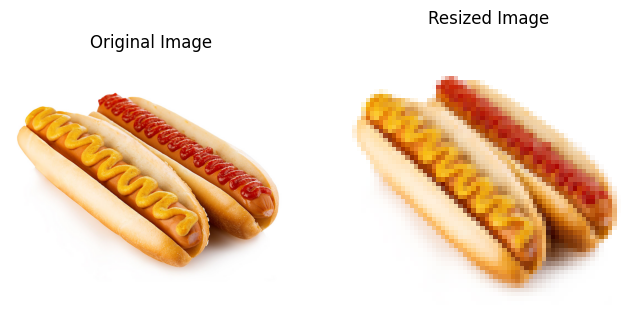

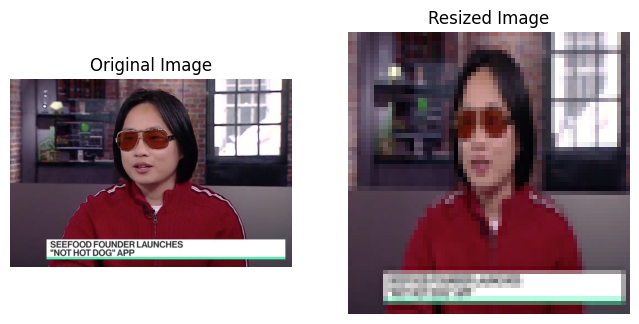

In [14]:
image_names = ['hotdog', 'nothotdog']

for name in image_names:
    image_path_original = f"../data/{name}.png"
    image_path_resized = f"../data/{name}_resized.png"

    img = Image.open(image_path_original)
    img_resized = img.resize((64, 64))

    img_resized.save(image_path_resized)

    # Getting the base64 string
    base64_image = encode_image(image_path_resized)
    show_images(image_path_original, image_path_resized)

In [15]:
class HotdogNotHotdog(BaseModel):
    is_hotdog: bool

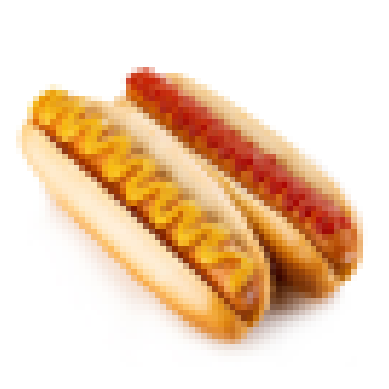

{ "is_hotdog": true }


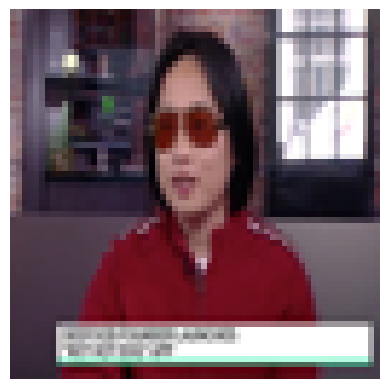

{ "is_hotdog": false }


In [16]:
system_prompt = """
Analyze the image and determine if it contains a hotdog or not.
If it does, return true. If it doesn't, return false.
"""

for image_name in image_names:
    image_path = f"../data/{image_name}_resized.png"
    base64_image = encode_image(image_path)

    # Display the image
    img = Image.open(image_path)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

    response = ollama.chat(
        messages=[
            {
                'role': 'system',
                'content': system_prompt
            },
            {
                'role': 'user',
                'images': [base64_image]
            }
        ],
        model='llama3.2-vision',
        format=HotdogNotHotdog.model_json_schema()
        )
    print(response.message.content)

## One more example

In [17]:
class MealInfo(BaseModel):
    title: str
    main_ingredients: list[str]

In [18]:
system_prompt = """
Parse the image with a meal and fill in JSON schema accurately, ensuring no hallucination or generation of false information. 

Extract structured information about a meal from the provided image. Return a JSON object with the following fields:

 * title: str, the name of the meal. Keep it short and concise.
 * main_ingredients: list[str], a list of ingredients used in the meal.

# Rules:
Do not hallucinate; only extract data from the provided image.
"""

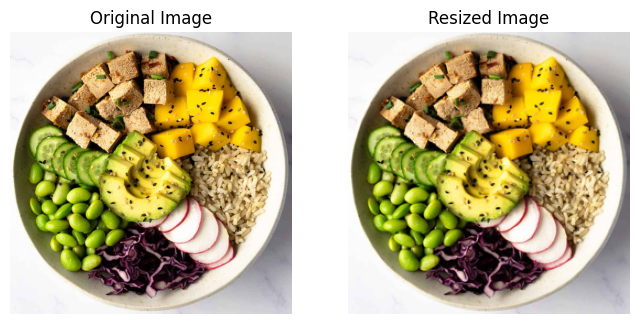

{ "title": "Tofu Bowl", "main_ingredients": ["tofu", "avocado", "mango", "brown rice", "cucumber", "radish", "edamame"] }


In [19]:
name = 'poke'

image_path_original = f"../data/{name}.png"
image_path_resized = f"../data/{name}_resized.png"

img = Image.open(image_path_original)
img_resized = img.resize((256, 256))

img_resized.save(image_path_resized)

# Getting the base64 string
base64_image = encode_image(image_path_resized)
show_images(image_path_original, image_path_resized)

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'images': [base64_image]
        }
    ],
    model='llama3.2-vision',
    format=MealInfo.model_json_schema()
    )
print(response.message.content)